In [1]:
# using MNIST data set
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# data have data(X) and target have the target values (y)
# total 70K records with 60K as training and 10k as test
X, y = mnist["data"], mnist["target"]

In [4]:
# 70 k totdal observations with 28X28 pixels
X.shape

(70000, 784)

In [5]:
#about
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

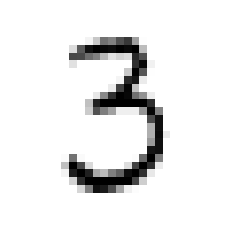

In [18]:
# display 1 picture
import matplotlib as mpl
import matplotlib.pyplot as plt

digit = X[50]
target = y[50]
image = digit.reshape(28, 28)
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()
# print(target)

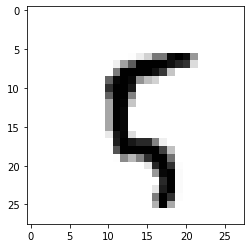

In [46]:
# check digit 5
plt.imshow(X[100].reshape(28, 28), cmap="binary")

In [19]:
# convert the target ot int
y = y.astype(np.uint8)

In [20]:
# lets split into train and test data set
# MNIST already have this
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
# we will be trying ot use cross validations folds
# some learning algo is sensitive to order of the training data, perform badly if they have similer instance in row 
# - shuffling would be good
# time series is bad with shuffling

# tring with 5 only
# 5 or not 5
# split train/test
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)


In [42]:
# Let try with stochastic gradient Descent
# it's need randomness during the training
# There is no "typical gradient descent" because it is rarely used in practise. 
from sklearn.linear_model import SGDClassifier
sgd_clasi = SGDClassifier(random_state=42,shuffle=True, n_jobs=-1)
sgd_clasi.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
# check if the prediction is correct with digit whichis number 3, so the predction would be false 
sgd_clasi.predict([digit])

array([False])

In [44]:
# for 5, it would be true
print(sgd_clasi.predict([X[100]]))
print(sgd_clasi.predict([X[0]]))


[ True]
[ True]


In [48]:
# lets try for number 9
y_train_9 = (y_train == 9)
y_test_9 = (y_test ==9)
from sklearn.linear_model import SGDClassifier
sgd_clasi9 = SGDClassifier(random_state=42,shuffle=True, n_jobs=-1)
sgd_clasi9.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

[ True]
[False]


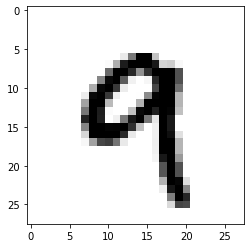

In [50]:
plt.imshow(X[110].reshape(28, 28), cmap="binary")
print(sgd_clasi9.predict([X[110]]))
print(sgd_clasi9.predict([X[100]]))

[ True]


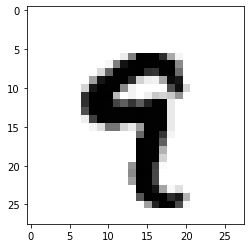

In [61]:
plt.imshow(X_test[206].reshape(28, 28), cmap="binary")
print(sgd_clasi9.predict([X_test[206]]))
# print(sgd_clasi9.predict([X[100]]))
# llooks like working fine